In [8]:
# Imports
import numpy as np
import pandas as pd
import xarray as xr
from minisom import MiniSom
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib import colormaps
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature as cf
from itertools import product
import itertools
import matplotlib.animation as animation

In [2]:
dataset = xr.open_dataarray('data/Z500Anoms_ERA5_v2.nc')

latSlice = slice(20, 80) #20N, 80N
lonSlice = slice(200, 310) #160W, 50W
dataarray = dataset.sel(lat=latSlice, lon=lonSlice)
dataarray = dataarray.stack(latlon=['lat', 'lon']).values

print(dataarray.shape)

(30681, 6771)


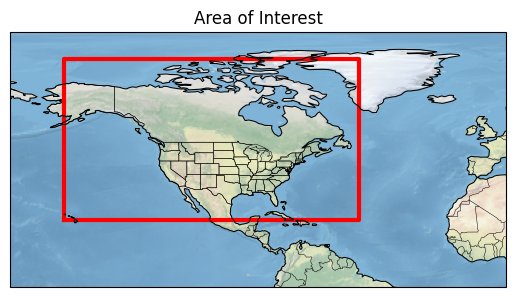

In [3]:
fig = plt.figure()
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

ax.set_extent((-180, 5, -5, 90), crs=proj)
ax.stock_img()
ax.coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
ax.add_feature(cfeature.STATES, facecolor='none', edgecolor='k', linewidth=0.35, zorder=10)
ax.add_feature(cf.BORDERS, linewidth=0.35, zorder=10)

plt.plot([200, 310, 310, 200, 200], [20, 20, 80, 80, 20], color='r', linewidth=3, transform=proj)
plt.title('Area of Interest')
plt.show()

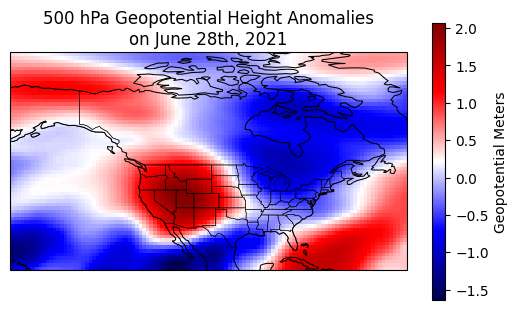

In [20]:
day = '2021-06-18'
day = dataset.sel(time=day, lat=latSlice, lon=lonSlice).values
lats = dataset.sel(lat=latSlice, lon=lonSlice).lat
lons = dataset.sel(lat=latSlice, lon=lonSlice).lon

fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
im = ax.pcolormesh(lons, lats, day, cmap='seismic', transform=ccrs.PlateCarree())
ax.coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
ax.add_feature(cfeature.STATES, facecolor='none', edgecolor='k', linewidth=0.35, zorder=10)
ax.add_feature(cf.BORDERS, linewidth=0.35, zorder=10)
fig.colorbar(im, shrink=.75, label='Geopotential Meters')
plt.title('500 hPa Geopotential Height Anomalies\non June 28th, 2021')
plt.show()

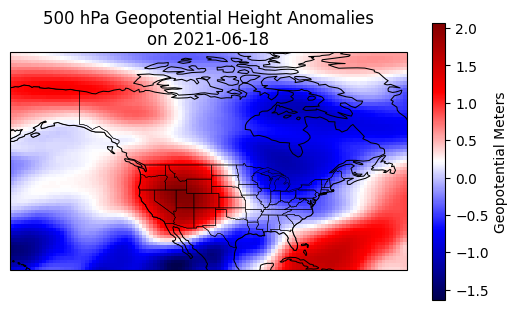

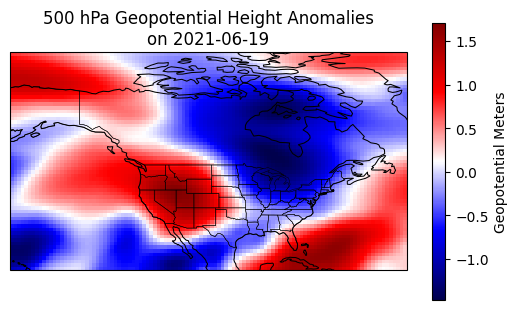

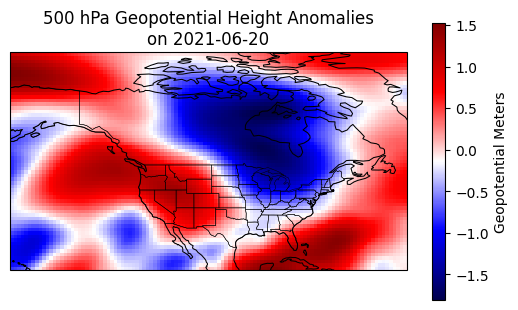

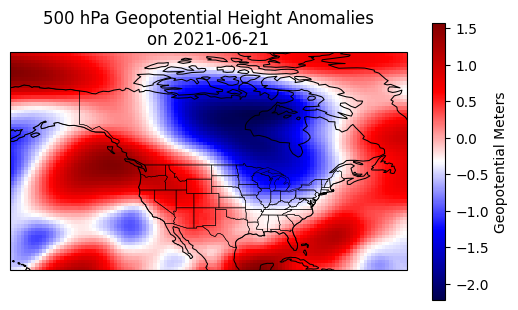

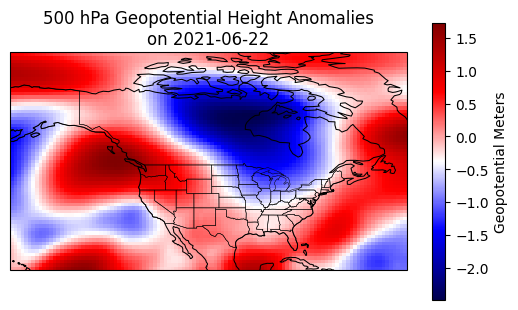

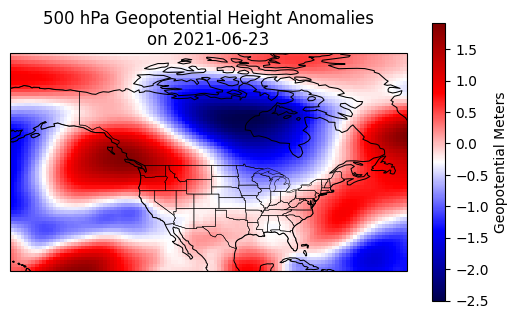

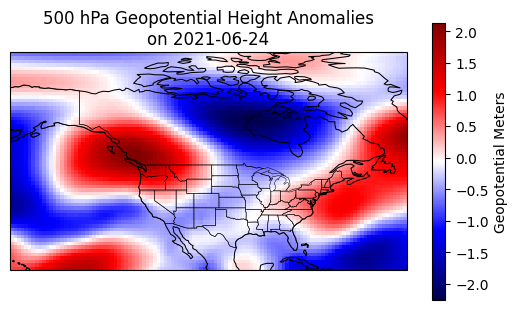

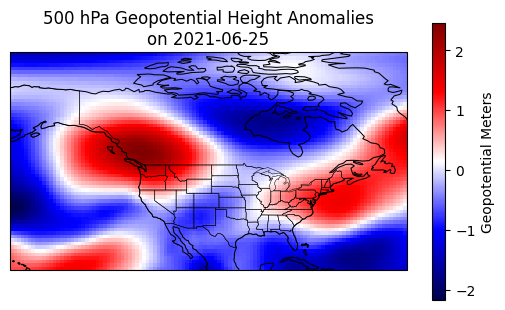

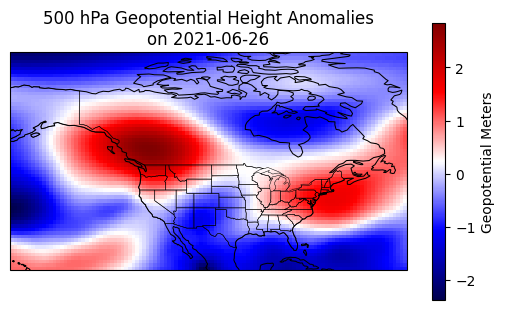

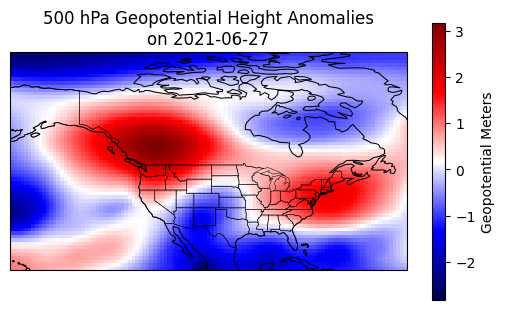

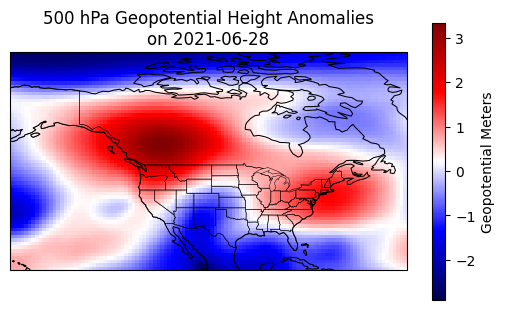

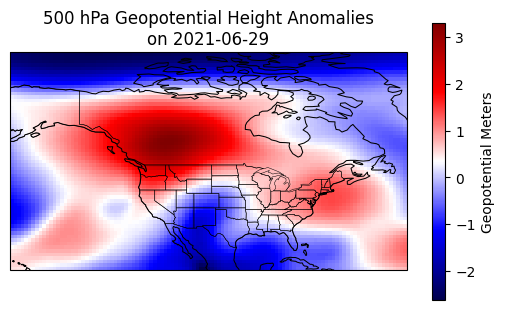

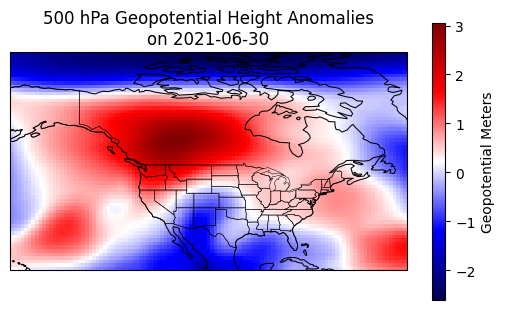

In [25]:
lats = dataset.sel(lat=latSlice, lon=lonSlice).lat
lons = dataset.sel(lat=latSlice, lon=lonSlice).lon
days = ['2021-06-18', '2021-06-19','2021-06-20', '2021-06-21', '2021-06-22',
        '2021-06-23','2021-06-24','2021-06-25', '2021-06-26', '2021-06-27', 
        '2021-06-28', '2021-06-29','2021-06-30']


artists = []

for day in days:
    data = dataset.sel(time=day, lat=latSlice, lon=lonSlice).values

    fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
    im = ax.pcolormesh(lons, lats, data, cmap='seismic', transform=ccrs.PlateCarree())
    ax.coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
    ax.add_feature(cfeature.STATES, facecolor='none', edgecolor='k', linewidth=0.35, zorder=10)
    ax.add_feature(cf.BORDERS, linewidth=0.35, zorder=10)
    fig.colorbar(im, shrink=.75, label='Geopotential Meters')
    plt.title(f'500 hPa Geopotential Height Anomalies\non {day}')
    plt.savefig(f'animation/{day}.png')

plt.show()